In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
import loguru as logger
from datetime import datetime, timedelta
import warnings
import os

warnings.simplefilter("ignore")

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
def load_df(csv_path, nrows=None):
    """
    This function is used to load large csv files with json columns into pandas dataframes
    """
    JSON_COLUMNS = [
        # "customDimensions", #the column has single quotes and hence not picked up by JSON Loader
        "device",
        "geoNetwork",
        # "hits", #the column has single quotes and hence not picked up by JSON Loader
        "totals",
        "trafficSource",
    ]
    df = pd.read_csv(
        csv_path,
        converters={column: json.loads for column in JSON_COLUMNS},
        dtype={"fullVisitorId": "str"},
        nrows=nrows,
    )

    for column in JSON_COLUMNS:
        columns_as_df = json_normalize(df[column])
        columns_as_df.columns = [
            f"{column}_{subcolumn}" for subcolumn in columns_as_df.columns
        ]
        df = df.drop(column, axis=1).merge(
            columns_as_df, right_index=True, left_index=True
        )

    print(f"Loaded {csv_path}, shape: {df.shape}")
    return df

In [3]:
train_file_path = os.path.join("/Users/divye/Desktop/gcrp_data/data", "train_v2.csv")
test_file_path = os.path.join("/Users/divye/Desktop/gcrp_data/data", "test_v2.csv")

df_train = load_df(csv_path=train_file_path, nrows=200000)
df_test = load_df(csv_path=test_file_path, nrows=200000)

print(f"Train shape {df_train.shape}, Test Shape {df_test.shape}")

Loaded /Users/divye/Desktop/gcrp_data/data/train_v2.csv, shape: (200000, 60)
Loaded /Users/divye/Desktop/gcrp_data/data/test_v2.csv, shape: (200000, 59)
Train shape (200000, 60), Test Shape (200000, 59)


In [4]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,device_operatingSystem,device_operatingSystemVersion,device_isMobile,device_mobileDeviceBranding,device_mobileDeviceModel,device_mobileInputSelector,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_flashVersion,device_language,device_screenColors,device_screenResolution,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_cityId,geoNetwork_networkDomain,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_networkLocation,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,1,NaN,NaN,NaN,NaN,(not set),google,organic,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,2,2,NaN,NaN,2,28,NaN,NaN,NaN,(not set),sites.google.com,referral,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,windj

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    200000 non-null  object
 1   customDimensions                                   200000 non-null  object
 2   date                                               200000 non-null  int64 
 3   fullVisitorId                                      200000 non-null  object
 4   hits                                               200000 non-null  object
 5   socialEngagementType                               200000 non-null  object
 6   visitId                                            200000 non-null  int64 
 7   visitNumber                                        200000 non-null  int64 
 8   visitStartTime                                     200000 non-null  int64 
 9   devi

In [6]:
df_train.nunique()

channelGrouping                                           8
customDimensions                                          6
date                                                     77
fullVisitorId                                        177052
hits                                                 180625
socialEngagementType                                      1
visitId                                              196151
visitNumber                                             263
visitStartTime                                       196157
device_browser                                           45
device_browserVersion                                     1
device_browserSize                                        1
device_operatingSystem                                   21
device_operatingSystemVersion                             1
device_isMobile                                           2
device_mobileDeviceBranding                               1
device_mobileDeviceModel                

In [7]:
df_train.columns

Index(['channelGrouping', 'customDimensions', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device_browser', 'device_browserVersion', 'device_browserSize',
       'device_operatingSystem', 'device_operatingSystemVersion',
       'device_isMobile', 'device_mobileDeviceBranding',
       'device_mobileDeviceModel', 'device_mobileInputSelector',
       'device_mobileDeviceInfo', 'device_mobileDeviceMarketingName',
       'device_flashVersion', 'device_language', 'device_screenColors',
       'device_screenResolution', 'device_deviceCategory',
       'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_country',
       'geoNetwork_region', 'geoNetwork_metro', 'geoNetwork_city',
       'geoNetwork_cityId', 'geoNetwork_networkDomain', 'geoNetwork_latitude',
       'geoNetwork_longitude', 'geoNetwork_networkLocation', 'totals_visits',
       'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_newVisits',
 

In [8]:
feature_list = [
    "fullVisitorId",
    "date",
    "visitNumber",  # exponential distribution
    "VisitsStartTime",
    "channelGrouping",
    "socialEngagementType",
    "device_browser",
    "device_operatingSystem",
    "device_isMobile",
    "device_deviceCategory",
    "geoNetwork_continent",
    "geoNetwork_subcontinent",
    "geoNetwork_country",
    "geoNetwork_region",
    "geoNetwork_city",
    "geoNetwork_metro",
    "geoNetwork_networkDomain",
    "geoNetwork_sessionQualityDim",
    "geoNetwork_timeOnSite",
    "geoNetwork_transactions",
    "trafficSource_campaign",
    "trafficSource_soure",
    "trafficSource_medium",
    "trafficSource_keyword",
    "trafficSource_referralPath",
    "trafficSource_isTrueDirect",
    "trafficSource_adwordsClickInfo.page",
    "trafficSource_adwordsClickInfo.slot",
    "trafficSource_adwordsClickInfo.adNetworkType",
    "trafficSource_isVideoAd",
]

In [9]:
"""
In this section of code, we are doing the following steps as part of preprocessing.
1. filling the boolean features missing value with 0
2. from POSIX timestamp to datetime
3. from integer date to datetime date
"""

df_train["date"] = pd.to_datetime(df_train["date"], format="%Y%m%d")
df_train["visitStartTime"] = df_train["visitStartTime"].apply(datetime.fromtimestamp)

df_train["totals_newVisits"] = df_train["totals_newVisits"].fillna(0)
df_train["totals_bounces"] = df_train["totals_bounces"].fillna(0)
df_train["trafficSource_isTrueDirect"] = df_train["trafficSource_isTrueDirect"].fillna(
    0
)
df_train["device_isMobile"] = df_train["device_isMobile"].map({True: 1, False: 0})
# df_train["totals_timeOnSite"] = df_train["totals_timeOnSite"].fillna(0)

### Q: Why are we using log(1+x) transformation compared to log(x)?
#### A: We use log(1+x) as log transformation as it is conditioned better near 0 which means log (1+x) will vary from 0 to +inf whereas log(x) varies -inf to +inf. This gives us a target that is easier to work with in regression problems. The non-zero values would follow a normal distribution in both cases.

count    200000.000000
mean          0.192851
std           1.846793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          22.427650
Name: target, dtype: float64


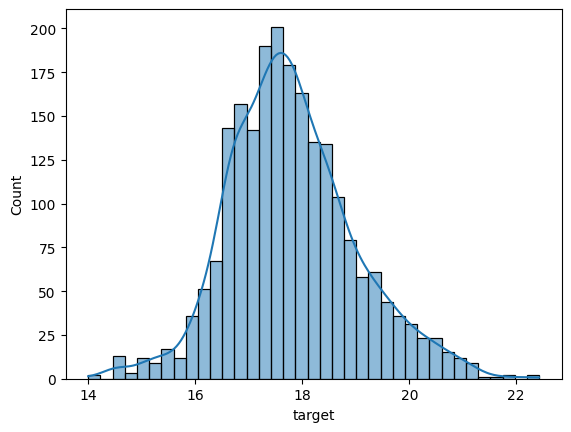

In [10]:
df_train["target"] = np.log1p(
    df_train["totals_transactionRevenue"].fillna(0).astype("float")
)

sns.histplot(df_train[df_train.target > 0]["target"], kde=True)
print(df_train.target.describe())

count    2167.000000
mean       17.798869
std         1.188319
min        13.997832
25%        17.000822
50%        17.686086
75%        18.475311
max        22.427650
Name: target, dtype: float64


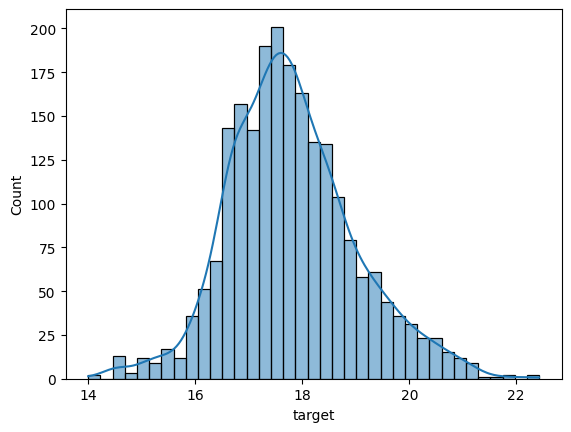

In [11]:
df_train["target"] = np.log(df_train["totals_transactionRevenue"].astype("float"))
# we use log(1+x) as log transformation as it is conditioned better near 0

sns.histplot(df_train[df_train.target > 0]["target"], kde=True)
print(df_train.target.describe())

In [12]:
df_train["totals_transactionRevenue"] = df_train.totals_transactionRevenue.astype(
    "float"
)
df_train["target"] = np.log1p(df_train["totals_transactionRevenue"])

In [13]:
revenue = np.round(100 * df_train.target.count() / df_train.shape[0], 2)
print(f"Total Visits with non-zero Revenue = {revenue}%")

Total Visits with non-zero Revenue = 1.08%


In [14]:
# df_train["device_browser"] = np.where((df_train.totals_transactionRevenue==0) | (df_train.totals_transactionRevenue.isna()),
#                                       "(Others)",
#                                       df_train.device_browser)
# df_train["device_browser"].value_counts()

### Q: Through what channel are we getting most revenue generating footprints and what channel has the most generous customers?
#### A: Referrals is the channel getting most number of revenue generaring footprints contributing 48% of the total revenue, while organic search is getting us the most traffic. Visits coming Direct to the store are spending the most amount of dollars per order.

In [15]:
aggregations = {
    "fullVisitorId": "count",
    "totals_totalTransactionRevenue": "count",
    "totals_transactionRevenue": "sum",
}
col_names = ["Visitors", "VisitorsWithRevenue", "TotalRevenue"]

# ChannelGrouping
channel = df_train.groupby("channelGrouping").agg(aggregations)
channel.columns = col_names
channel["Visitors"] = np.where(channel["Visitors"] == 0, 1, channel["Visitors"])
channel["VisitorsWithRevenue"] = np.where(
    channel["VisitorsWithRevenue"] == 0, 1, channel["VisitorsWithRevenue"]
)
channel["revenuePerVisit"] = np.round(channel["TotalRevenue"] / channel["Visitors"], 2)
channel["spendPerRevenueVisit"] = np.round(
    channel["TotalRevenue"] / channel["VisitorsWithRevenue"], 2
)
channel.sort_values(by="Visitors", ascending=False, inplace=True)

# DeviceBrowser
browser = df_train.groupby("device_browser").agg(aggregations)
browser.index = np.where(
    browser.totals_transactionRevenue == 0, "(Others)", browser.index
)
browser = browser.groupby(browser.index).agg(
    {
        "fullVisitorId": "sum",
        "totals_totalTransactionRevenue": "sum",
        "totals_transactionRevenue": "sum",
    }
)
browser.columns = col_names
browser["Visitors"] = np.where(browser["Visitors"] == 0, 1, browser["Visitors"])
browser["VisitorsWithRevenue"] = np.where(
    browser["VisitorsWithRevenue"] == 0, 1, browser["VisitorsWithRevenue"]
)
browser["revenuePerVisit"] = np.round(browser["TotalRevenue"] / browser["Visitors"], 2)
browser["spendPerRevenueVisit"] = np.round(
    browser["TotalRevenue"] / browser["VisitorsWithRevenue"], 2
)
browser.sort_values(by="Visitors", ascending=False, inplace=True)

# OperatingSystem
operating_system = df_train.groupby("device_operatingSystem").agg(aggregations)
operating_system.columns = col_names
operating_system["Visitors"] = np.where(
    operating_system["Visitors"] == 0, 1, operating_system["Visitors"]
)
operating_system["VisitorsWithRevenue"] = np.where(
    operating_system["VisitorsWithRevenue"] == 0,
    1,
    operating_system["VisitorsWithRevenue"],
)
operating_system["revenuePerVisit"] = np.round(
    operating_system["TotalRevenue"] / operating_system["Visitors"], 2
)
operating_system["spendPerRevenueVisit"] = np.round(
    operating_system["TotalRevenue"] / operating_system["VisitorsWithRevenue"], 2
)
operating_system.sort_values(by="Visitors", ascending=False, inplace=True)


# DeviceCategory
device = df_train.groupby("device_deviceCategory").agg(aggregations)
device.columns = col_names
device["Visitors"] = np.where(device["Visitors"] == 0, 1, device["Visitors"])
device["VisitorsWithRevenue"] = np.where(
    device["VisitorsWithRevenue"] == 0,
    1,
    device["VisitorsWithRevenue"],
)
device["revenuePerVisit"] = np.round(device["TotalRevenue"] / device["Visitors"], 2)
device["spendPerRevenueVisit"] = np.round(
    device["TotalRevenue"] / device["VisitorsWithRevenue"], 2
)
device.sort_values(by="Visitors", ascending=False, inplace=True)

# Country
country = df_train.groupby("geoNetwork_country").agg(aggregations)
country.index = np.where(
    country.totals_transactionRevenue == 0, "(Others)", country.index
)
country = country.groupby(country.index).agg(
    {
        "fullVisitorId": "sum",
        "totals_totalTransactionRevenue": "sum",
        "totals_transactionRevenue": "sum",
    }
)
country.columns = col_names
country["Visitors"] = np.where(country["Visitors"] == 0, 1, country["Visitors"])
country["VisitorsWithRevenue"] = np.where(
    country["VisitorsWithRevenue"] == 0,
    1,
    country["VisitorsWithRevenue"],
)
country["revenuePerVisit"] = np.round(country["TotalRevenue"] / country["Visitors"], 2)
country["spendPerRevenueVisit"] = np.round(
    country["TotalRevenue"] / country["VisitorsWithRevenue"], 2
)
country.sort_values(by="Visitors", ascending=False, inplace=True)

# Region
region = df_train.groupby("geoNetwork_region").agg(aggregations)
region.index = np.where(region.totals_transactionRevenue == 0, "(Others)", region.index)
region = region.groupby(region.index).agg(
    {
        "fullVisitorId": "sum",
        "totals_totalTransactionRevenue": "sum",
        "totals_transactionRevenue": "sum",
    }
)
region.columns = col_names
region["Visitors"] = np.where(region["Visitors"] == 0, 1, region["Visitors"])
region["VisitorsWithRevenue"] = np.where(
    region["VisitorsWithRevenue"] == 0,
    1,
    region["VisitorsWithRevenue"],
)
region["revenuePerVisit"] = np.round(region["TotalRevenue"] / region["Visitors"], 2)
region["spendPerRevenueVisit"] = np.round(
    region["TotalRevenue"] / region["VisitorsWithRevenue"], 2
)
region.sort_values(by="Visitors", ascending=False, inplace=True)

# TrafficSource
traffic = df_train.groupby("trafficSource_source").agg(aggregations)
traffic.index = np.where(
    traffic.totals_transactionRevenue == 0, "(Others)", traffic.index
)
traffic = traffic.groupby(traffic.index).agg(
    {
        "fullVisitorId": "sum",
        "totals_totalTransactionRevenue": "sum",
        "totals_transactionRevenue": "sum",
    }
)
traffic.columns = col_names
traffic["Visitors"] = np.where(traffic["Visitors"] == 0, 1, traffic["Visitors"])
traffic["VisitorsWithRevenue"] = np.where(
    traffic["VisitorsWithRevenue"] == 0,
    1,
    traffic["VisitorsWithRevenue"],
)
traffic["revenuePerVisit"] = np.round(traffic["TotalRevenue"] / traffic["Visitors"], 2)
traffic["spendPerRevenueVisit"] = np.round(
    traffic["TotalRevenue"] / traffic["VisitorsWithRevenue"], 2
)
traffic.sort_values(by="Visitors", ascending=False, inplace=True)

In [16]:
100 * channel[channel.TotalRevenue == channel.TotalRevenue.max()][
    "TotalRevenue"
] / channel.TotalRevenue.sum()

channelGrouping
Referral    48.01379
Name: TotalRevenue, dtype: float64

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py


def plotly_bargraphs(df, col_name, category_name, color):
    if len(category_name) == 0:
        legend_val = False
    else:
        legend_val = True
    trace = go.Figure(
        go.Bar(
            x=df[col_name][::-1],
            y=df.index[::-1],
            marker=dict(color=color),
            orientation="h",
            name=category_name,
            showlegend=legend_val,
        )
    )
    return trace


plot11 = plotly_bargraphs(
    channel, "Visitors", "Channel", color="rgba(246, 78, 139, 0.6)"
)
plot12 = plotly_bargraphs(
    channel, "VisitorsWithRevenue", "", color="rgba(246, 78, 139, 0.6)"
)
plot13 = plotly_bargraphs(
    channel, "revenuePerVisit", "", color="rgba(246, 78, 139, 0.6)"
)
plot14 = plotly_bargraphs(
    channel, "spendPerRevenueVisit", "", color="rgba(246, 78, 139, 0.6)"
)

plot21 = plotly_bargraphs(
    browser, "Visitors", "Browser", color="rgba(36, 70, 139, 0.6)"
)
plot22 = plotly_bargraphs(
    browser, "VisitorsWithRevenue", "", color="rgba(36, 70, 139, 0.6)"
)
plot23 = plotly_bargraphs(
    browser, "revenuePerVisit", "", color="rgba(36, 70, 139, 0.6)"
)
plot24 = plotly_bargraphs(
    browser, "spendPerRevenueVisit", "", color="rgba(36, 70, 139, 0.6)"
)

plot31 = plotly_bargraphs(
    operating_system, "Visitors", "Operating System", color="rgba(136, 10, 139, 0.6)"
)
plot32 = plotly_bargraphs(
    operating_system, "VisitorsWithRevenue", "", color="rgba(136, 10, 139, 0.6)"
)
plot33 = plotly_bargraphs(
    operating_system, "revenuePerVisit", "", color="rgba(136, 10, 139, 0.6)"
)
plot34 = plotly_bargraphs(
    operating_system, "spendPerRevenueVisit", "", color="rgba(136, 10, 139, 0.6)"
)

plot41 = plotly_bargraphs(
    device, "Visitors", "Device Category", color="rgba(136, 0, 0, 0.6)"
)
plot42 = plotly_bargraphs(
    device, "VisitorsWithRevenue", "", color="rgba(136, 0, 0, 0.6)"
)
plot43 = plotly_bargraphs(device, "revenuePerVisit", "", color="rgba(136, 0, 0, 0.6)")
plot44 = plotly_bargraphs(
    device, "spendPerRevenueVisit", "", color="rgba(136, 0, 0, 0.6)"
)

plot51 = plotly_bargraphs(country, "Visitors", "Country", color="rgba(0, 70, 0, 0.6)")
plot52 = plotly_bargraphs(
    country, "VisitorsWithRevenue", "", color="rgba(0, 70, 0, 0.6)"
)
plot53 = plotly_bargraphs(country, "revenuePerVisit", "", color="rgba(0, 70, 0, 0.6)")
plot54 = plotly_bargraphs(
    country, "spendPerRevenueVisit", "", color="rgba(0, 70, 0, 0.6)"
)

plot61 = plotly_bargraphs(region, "Visitors", "Region", color="rgba(0, 0, 130, 0.6)")
plot62 = plotly_bargraphs(
    region, "VisitorsWithRevenue", "", color="rgba(0, 0, 130, 0.6)"
)
plot63 = plotly_bargraphs(region, "revenuePerVisit", "", color="rgba(0, 0, 130, 0.6)")
plot64 = plotly_bargraphs(
    region, "spendPerRevenueVisit", "", color="rgba(0, 0, 130, 0.6)"
)

plot71 = plotly_bargraphs(traffic, "Visitors", "Traffic", color="rgba(136, 70, 0, 0.6)")
plot72 = plotly_bargraphs(
    traffic, "VisitorsWithRevenue", "", color="rgba(136, 70, 0, 0.6)"
)
plot73 = plotly_bargraphs(traffic, "revenuePerVisit", "", color="rgba(136, 70, 0, 0.6)")
plot74 = plotly_bargraphs(
    traffic, "spendPerRevenueVisit", "", color="rgba(136, 70, 0, 0.6)"
)


fig = go.Figure()

fig = make_subplots(
    rows=7,
    cols=4,
    shared_xaxes=True,
    shared_yaxes=False,
    vertical_spacing=0.03,
    horizontal_spacing=0.15,
    subplot_titles=[
        "Categorical grouping <br> Visits",
        "Categorical grouping <br> Visits With Revenue",
        "Categorical grouping <br> Revenue per Visit",
        "Categorical grouping <br> Spend per Revenue Visit",
    ],
)

# Adding traces to the suplots
fig.add_trace(plot11.data[0], row=1, col=1)
fig.add_trace(plot12.data[0], row=1, col=2)
fig.add_trace(plot13.data[0], row=1, col=3)
fig.add_trace(plot14.data[0], row=1, col=4)

fig.add_trace(plot21.data[0], row=2, col=1)
fig.add_trace(plot22.data[0], row=2, col=2)
fig.add_trace(plot23.data[0], row=2, col=3)
fig.add_trace(plot24.data[0], row=2, col=4)

fig.add_trace(plot31.data[0], row=3, col=1)
fig.add_trace(plot32.data[0], row=3, col=2)
fig.add_trace(plot33.data[0], row=3, col=3)
fig.add_trace(plot34.data[0], row=3, col=4)

fig.add_trace(plot41.data[0], row=4, col=1)
fig.add_trace(plot42.data[0], row=4, col=2)
fig.add_trace(plot43.data[0], row=4, col=3)
fig.add_trace(plot44.data[0], row=4, col=4)

fig.add_trace(plot51.data[0], row=5, col=1)
fig.add_trace(plot52.data[0], row=5, col=2)
fig.add_trace(plot53.data[0], row=5, col=3)
fig.add_trace(plot54.data[0], row=5, col=4)

fig.add_trace(plot61.data[0], row=6, col=1)
fig.add_trace(plot62.data[0], row=6, col=2)
fig.add_trace(plot63.data[0], row=6, col=3)
fig.add_trace(plot64.data[0], row=6, col=4)

fig.add_trace(plot71.data[0], row=7, col=1)
fig.add_trace(plot72.data[0], row=7, col=2)
fig.add_trace(plot73.data[0], row=7, col=3)
fig.add_trace(plot74.data[0], row=7, col=4)

# Updating layout
fig.update_layout(
    yaxis={"dtick": 1},
    margin={"t": 100, "b": 100},
    height=2000,
    width=1000,
    paper_bgcolor="rgb(233,233,233)",
    title="Interactive Plots",
)
fig.update_annotations(font_size=12)

# Displaying the plot
py.iplot(fig, filename="channel-plots")